
[과제] train.csv 파일을 불러와서 분류모델링 평가를 아래와 같이 수행하세요.
- dt 모델을 적용하고 GridSearchCV를 사용, 교차검증과 성능 개선을 위한 하이퍼파라미터 튜닝
- accuracy에 추가하여 confusion matrix, accuracy, precision, recall, roc auc score 평가


In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)



# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 0.7486
RandomForestClassifier 정확도:0.8603
LogisticRegression 정확도: 0.8603


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('정확도 : {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8076
정확도 : 0.8827


In [105]:
pred_proba = dt_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)


get_clf_eval(y_test ,pred,pred_proba)

오차 행렬
[[107  11]
 [ 14  47]]
정확도: 0.8603, 정밀도: 0.8103, 재현율: 0.7705, F1: 0.7899, AUC:0.7437


[과제] diabetes.csv 데이터세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.

SkinThickness 와 Insulin의 0 값은 상당히 많기 때문에 일괄 삭제가 어려우며 평균값으로 대체
정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
산출된 임계값을 적용한 평가

※ 피처 정보
'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압), 'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값, 'Insulin'(혈청 인슈린), 'BMI'(체질량 지수), 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값), 'Age', 'Outcome'
데이터 세트는 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터임.

In [107]:
import pandas as pd
import numpy as np

df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [108]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [109]:
print(df.SkinThickness.value_counts()[0])
print()
print(df.Insulin.value_counts()[0])
print()
print(df.Outcome.value_counts())

227

374

0    500
1    268
Name: Outcome, dtype: int64


In [110]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df=pd.read_csv('diabetes.csv')
y_df = df['Outcome']
X_df= df.drop('Outcome',axis=1)

X_df.loc[df.SkinThickness==0,'SkinThickness'] = df.SkinThickness.mean()
X_df.loc[df.Insulin==0,'Insulin'] = df.Insulin.mean()

X_train, X_test, y_train, y_test=train_test_split(X_df, y_df, test_size=0.2, random_state=11)
X_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,79.799479,33.6,0.627,50
1,1,85,66,29.000000,79.799479,26.6,0.351,31
2,8,183,64,20.536458,79.799479,23.3,0.672,32
3,1,89,66,23.000000,94.000000,28.1,0.167,21
4,0,137,40,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63
764,2,122,70,27.000000,79.799479,36.8,0.340,27
765,5,121,72,23.000000,112.000000,26.2,0.245,30
766,1,126,60,20.536458,79.799479,30.1,0.349,47


In [131]:
y_test.shape

(154,)

In [132]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 0.6753
RandomForestClassifier 정확도:0.7403
LogisticRegression 정확도: 0.7662


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [134]:
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test,lr_pred,pred_proba)

오차 행렬
[[91  9]
 [27 27]]
정확도: 0.7662, 정밀도: 0.7500, 재현율: 0.5000, F1: 0.6000, AUC:0.8159


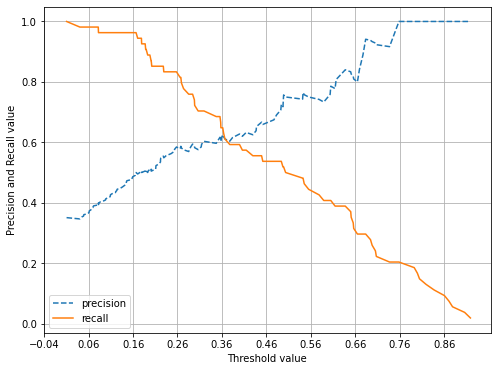

In [135]:
pred_proba_c1=lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test , pred_proba)

In [136]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 

from sklearn.preprocessing import Binarizer


def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)
        print()
        
thresholds = [0.2, 0.25, 0.3, 0.35, 0.4]
pred_proba = lr_clf.predict_proba(X_test)[:,1]        
get_eval_by_threshold(y_test ,pred_proba.reshape(-1,1), thresholds )

임곗값: 0.2
오차 행렬
[[54 46]
 [ 7 47]]
정확도: 0.6558, 정밀도: 0.5054, 재현율: 0.8704, F1: 0.6395, AUC:0.8159

임곗값: 0.25
오차 행렬
[[66 34]
 [ 9 45]]
정확도: 0.7208, 정밀도: 0.5696, 재현율: 0.8333, F1: 0.6767, AUC:0.8159

임곗값: 0.3
오차 행렬
[[72 28]
 [16 38]]
정확도: 0.7143, 정밀도: 0.5758, 재현율: 0.7037, F1: 0.6333, AUC:0.8159

임곗값: 0.35
오차 행렬
[[76 24]
 [17 37]]
정확도: 0.7338, 정밀도: 0.6066, 재현율: 0.6852, F1: 0.6435, AUC:0.8159

임곗값: 0.4
오차 행렬
[[81 19]
 [23 31]]
정확도: 0.7273, 정밀도: 0.6200, 재현율: 0.5741, F1: 0.5962, AUC:0.8159

